# Plot session behavioral data

Dataset: Allen Institute for Brain Science: Visual Coding - Neuropixels  
© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels

## Set-up

### set paths

In [1]:
# set paths
PROJECT_PATH = "G:/Shared drives/visual_encoding" # shared results directory

### imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neo

In [4]:
# custom imports
import sys
sys.path.append('../../')
from allen_vc.neo_utils import get_analogsignal, get_analogsignal_names

## Plot pupil data and runnning-wheel data
time-series and distribution

### plot an example session

In [25]:
def plot_session_behavior(block, behavior, y_units=None, fname_out=None, show=True):
    # get behavioral data of interest
    try:
        signal, time = get_analogsignal(block, behavior, segment_idx=0)
    except:
        print(f'No {behavior} data found.')
        return

    # init figure
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=[12,4], gridspec_kw={'width_ratios': [3,2]})
    fig.suptitle(behavior.replace('_', ' '))
    if y_units is not None:
        label = f'{behavior.replace("_", " ")} ({y_units})'
    else:
        label = f'{behavior.replace("_", " ")}'

    # plot time-series and label
    ax0.plot(time, signal)
    ax0.set(xlabel="time (s)", ylabel=label)

    # plot distribution
    sns.kdeplot(signal, ax=ax1)
    ax1.set(xlabel=label)

    # save and show
    if fname_out is not None:
        plt.savefig(fname_out)
    if show:
        plt.show()
    else:
        plt.close()

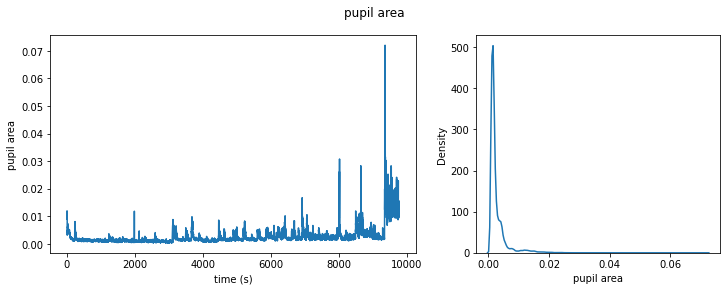

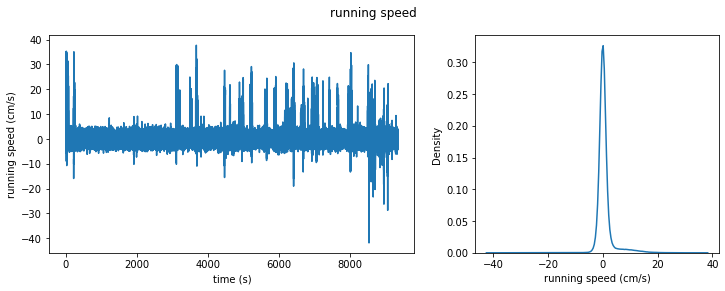

In [15]:
# plot data for an example session

# choose example session of interest
SESSION_ID = 766640955 # example session id

# load example block and get pupil data
block = neo.io.NeoMatlabIO(f"{PROJECT_PATH}/data/blocks/sessions/block_{SESSION_ID}.mat").read_block()
plot_session_behavior(block, 'pupil_area')
plot_session_behavior(block, 'running_speed', "cm/s")



### plot all sessions

In [26]:
# Plot behavioral data for all sessions

# loop through all files
data_dir = f"{PROJECT_PATH}/data/blocks/sessions"
files = os.listdir(data_dir)
for i_file, fname in enumerate(files):
    print(f"\nAnalyzing: {fname} (file {i_file+1}/{len(files)})")
    
    # import data
    block = neo.io.NeoMatlabIO(f"{data_dir}/{fname}").read_block()
    session = fname.split('_')[1].split('.')[0]

    # plot
    plot_session_behavior(block, 'pupil_area', show=False, 
                          fname_out=f"{PROJECT_PATH}/figures/behavior/pupil/session/pupil_{session}.png")
    plot_session_behavior(block, 'running_speed', "cm/s", show=False, 
                          fname_out=f"{PROJECT_PATH}/figures/behavior/running/session/pupil_{session}.png")



Analyzing: block_766640955.mat (file 1/23)

Analyzing: block_767871931.mat (file 2/23)

Analyzing: block_768515987.mat (file 3/23)
No pupil_area data found.

Analyzing: block_771160300.mat (file 4/23)

Analyzing: block_771990200.mat (file 5/23)

Analyzing: block_774875821.mat (file 6/23)

Analyzing: block_778240327.mat (file 7/23)

Analyzing: block_778998620.mat (file 8/23)

Analyzing: block_779839471.mat (file 9/23)

Analyzing: block_781842082.mat (file 10/23)

Analyzing: block_786091066.mat (file 11/23)

Analyzing: block_787025148.mat (file 12/23)

Analyzing: block_789848216.mat (file 13/23)

Analyzing: block_793224716.mat (file 14/23)

Analyzing: block_794812542.mat (file 15/23)

Analyzing: block_816200189.mat (file 16/23)

Analyzing: block_821695405.mat (file 17/23)

Analyzing: block_829720705.mat (file 18/23)

Analyzing: block_831882777.mat (file 19/23)

Analyzing: block_835479236.mat (file 20/23)

Analyzing: block_839068429.mat (file 21/23)

Analyzing: block_840012044.mat (file 